# Lightness Correction for Color-Coded FA Maps

To install the necessary prerequisites for this tool:

    pip install ipython[all]
    pip install scikit-image
    pip install seaborn


Import the required packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from skimage import io, color

Read the FAM and CFAM from PNG images, remove alpha channel.

In [2]:
fam = io.imread("fam.png")
fam_norm = fam.astype(float) / 255
cfam = io.imread("cfam.png")[:, :, 0:3]
cfam_lab = color.rgb2lab(cfam)
cfam_lightness = cfam_lab[:, :, 0].astype(float) / 100

Inject the FA values from the FAM into the L\* channel of the CIE L\*a\*b\* representation of the CFAM to get the LCFAM

In [3]:
lcfam_lab = cfam_lab
lcfam_lightness = fam_norm * 100
lcfam_lab[:, :, 0] = lcfam_lightness
lcfam = color.lab2rgb(lcfam_lab)

Save the resulting lightness corrected FA map to `lcfam.png`. Note that some loss of precision is to be expected here since all conversions were done on 64 bit floating point numbers but PNG only stores 8 bit of information in each color channel.

In [4]:
warnings.simplefilter("ignore")
io.imsave("lcfam.png", lcfam)

Load the LCFAM's L\* channel from the resulting PNG file to visualise the difference between LCFAM L\* and then input FAM. This will be slightly different from the original `lcfam_lightness` computed above due to the precision loss in saving mentioned above.

In [5]:
lcfam_lightness = color.rgb2lab(io.imread("lcfam.png")[:, :, 0:3])[:, :, 0]

Visualize the results in a single figure environment

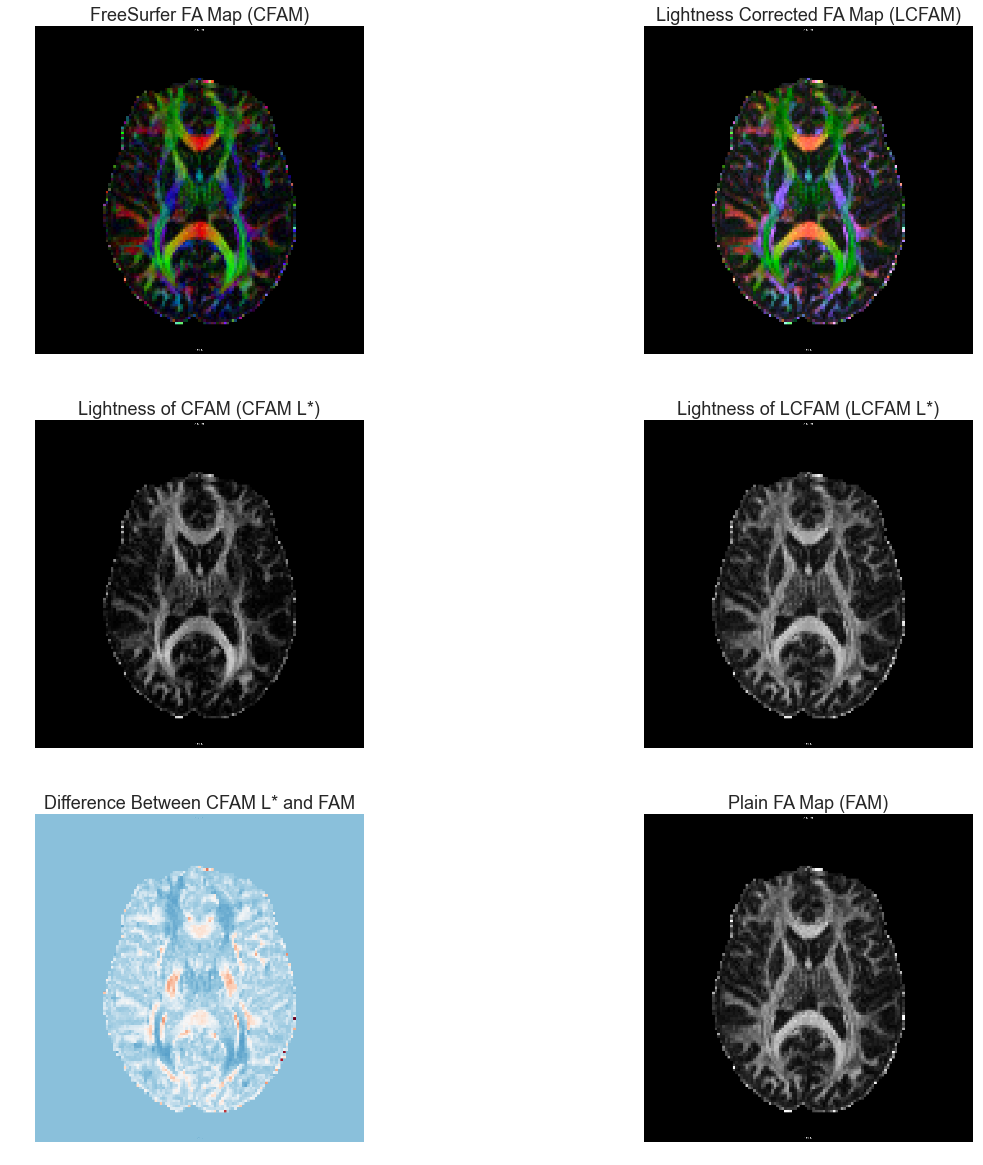

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0, 0].imshow(cfam)
axes[0, 0].axis("off")
axes[0, 0].set_title("FreeSurfer FA Map (CFAM)", fontsize=18)

axes[0, 1].imshow(lcfam)
axes[0, 1].axis("off")
axes[0, 1].set_title("Lightness Corrected FA Map (LCFAM)", fontsize=18)

axes[1, 0].imshow(cfam_lightness, cmap="gray")
axes[1, 0].axis("off")
axes[1, 0].set_title("Lightness of CFAM (CFAM L*)", fontsize=18)

axes[1, 1].imshow(lcfam_lightness, cmap="gray")
axes[1, 1].axis("off")
axes[1, 1].set_title("Lightness of LCFAM (LCFAM L*)", fontsize=18)

axes[2, 0].imshow(fam_norm - cfam_lightness, cmap="RdBu_r")
axes[2, 0].axis("off")
axes[2, 0].set_title("Difference Between CFAM L* and FAM", fontsize=18)

axes[2, 1].imshow(fam_norm, cmap="gray")
axes[2, 1].axis("off")
axes[2, 1].set_title("Plain FA Map (FAM)", fontsize=18)

fig.savefig("figure.pdf")